# Binary Classification

**Problem Statement** - The Breast Cancer Wisconsin dataset contains features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. The goal is to predict whether the tumor is malignant or benign based on selected features. This is a binary classification problem.

### Packages Installation

In [1]:
!pip install scikt-learn
!pip install tensorflow
!pip install keras-models
!pip install keras-layers
!pip install keras-utils
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

ERROR: Could not find a version that satisfies the requirement scikt-learn (from versions: none)
ERROR: No matching distribution found for scikt-learn
ERROR: Could not find a version that satisfies the requirement keras-layers (from versions: none)
ERROR: No matching distribution found for keras-layers
  Preparing metadata (setup.py) ... done
  Created wheel for keras-utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=172350f2c7939c42282302a4e0c73f4e0612afdcf5e96895f24289cd024561e4
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras-utils


### Importing the packages and libraries that are required for the project

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, matthews_corrcoef, cohen_kappa_score, jaccard_score, log_loss
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, LSTM, Flatten, Dropout

###  Loading Data
###### https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [3]:
# Load dataset
df = pd.read_csv("data.csv")

In [4]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### EDA & Data Visualization

In [5]:
# Drop 'Unnamed: 32' and handle missing values if any
df = df.drop(['Unnamed: 32', 'id'], axis=1)

In [6]:
# Display the first few rows
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
print("Dataset Shape:", df.shape)
print("Dataset Info:")
print(df.info())
print("\nTarget Distribution:")
print(df['diagnosis'].value_counts(normalize=True))

Dataset Shape: (569, 31)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    

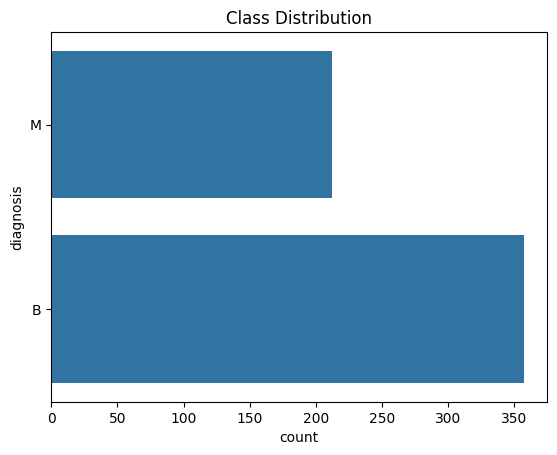

In [8]:
# Visualize distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df['diagnosis'])
plt.title('Class Distribution')
plt.show()

#### Describe Data

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#### Heatmap

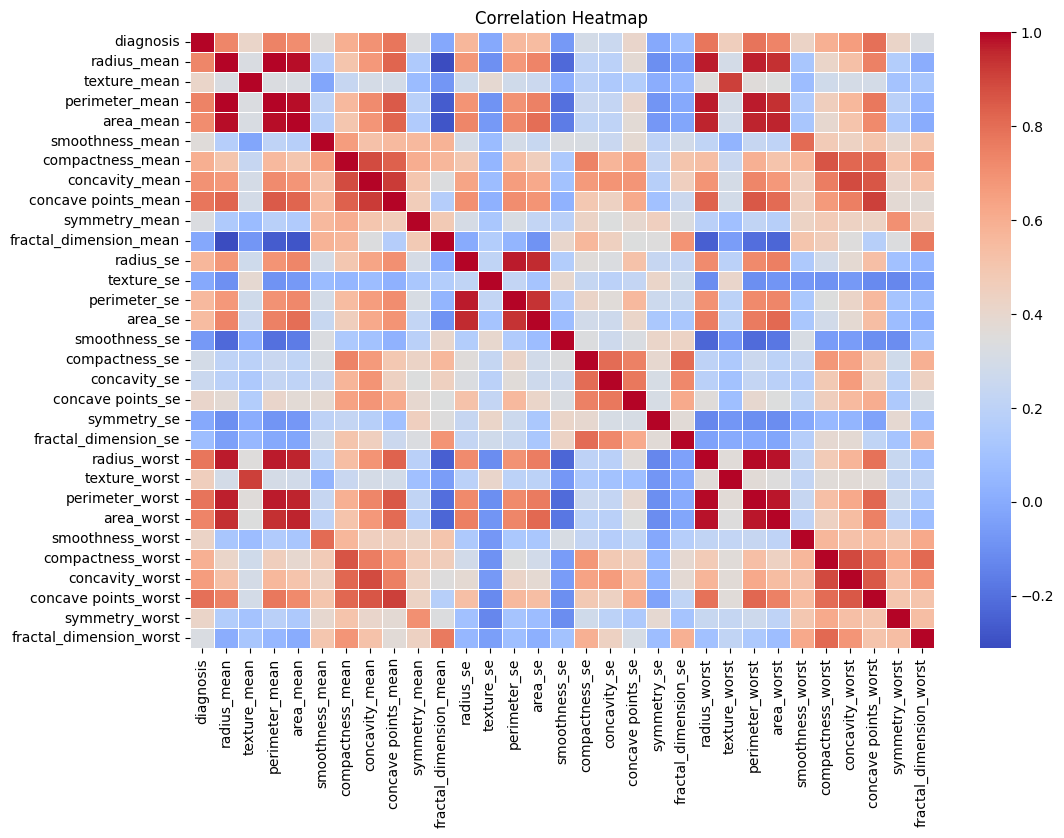

In [10]:
# Encode labels
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# EDA: Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=False, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#### Other Plots

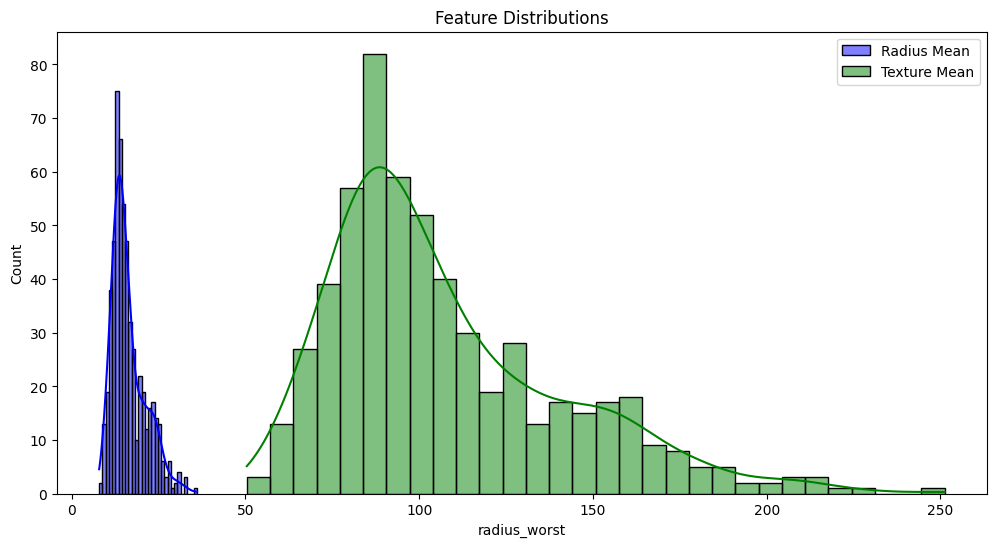

In [11]:
# EDA: Distribution Plot
plt.figure(figsize=(12, 6))
sns.histplot(df['radius_worst'], kde=True, bins=30, color='blue', label='Radius Mean')
sns.histplot(df['perimeter_worst'], kde=True, bins=30, color='green', label='Texture Mean')
plt.legend()
plt.title('Feature Distributions')
plt.show()

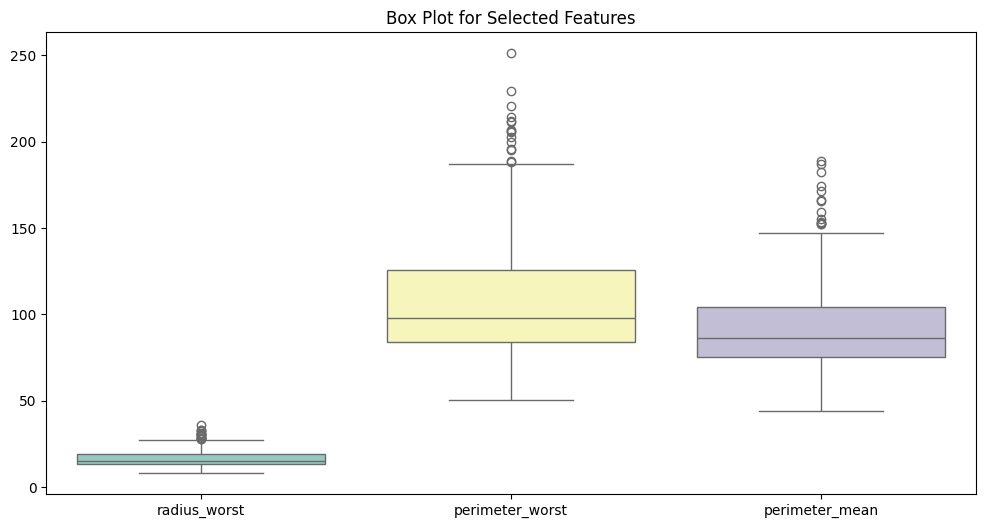

In [12]:
# EDA: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['radius_worst', 'perimeter_worst', 'perimeter_mean']], palette="Set3")
plt.title('Box Plot for Selected Features')
plt.show()

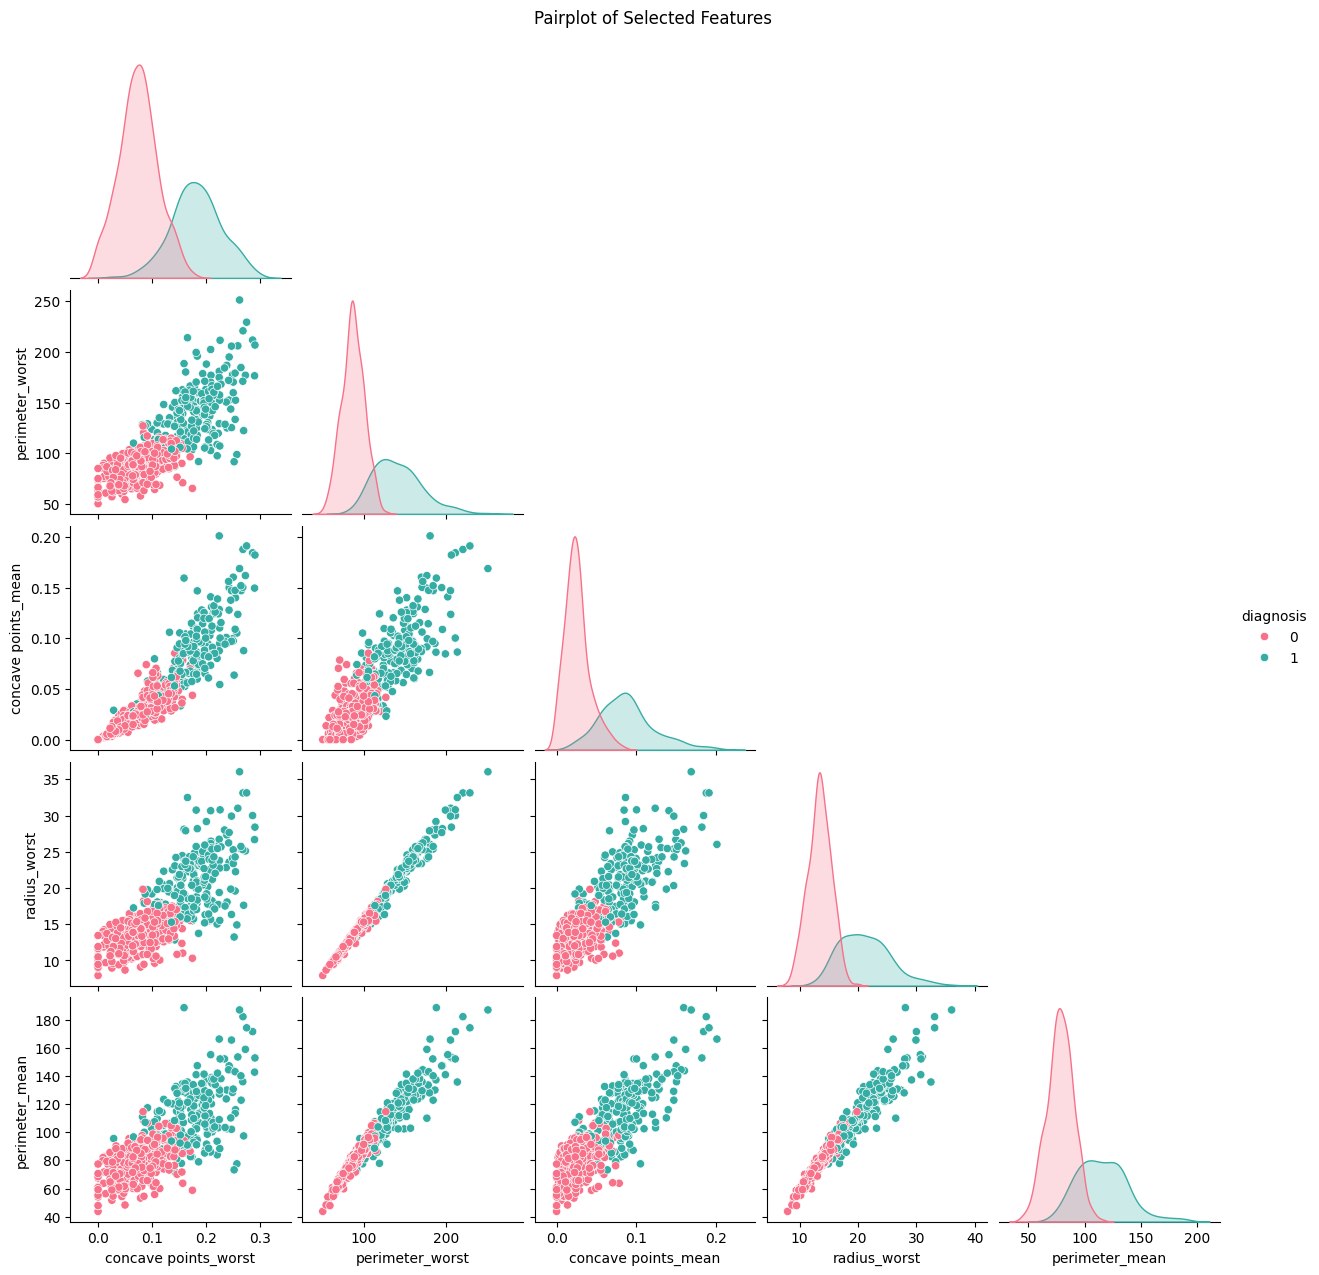

In [13]:
# EDA: Pairplot
selected_features_eda = ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'diagnosis']
sns.pairplot(df[selected_features_eda], hue='diagnosis', diag_kind='kde', corner=True, palette='husl')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

#### Handling Outliers

In [14]:
# Function to Detect Outliers Using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

In [15]:
outliers_radius = detect_outliers_iqr(df, 'perimeter_worst')
outliers_radius

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
23,1,21.16,23.04,137.2,1404.0,0.09428,0.10220,0.1097,0.08632,0.1769,...,29.17,35.59,188.0,2615.0,0.1401,0.2600,0.3155,0.2009,0.2822,0.07526
82,1,25.22,24.91,171.5,1878.0,0.10630,0.26650,0.3339,0.18450,0.1829,...,30.00,33.62,211.7,2562.0,0.1573,0.6076,0.6476,0.2867,0.2355,0.10510
108,1,22.27,19.67,152.8,1509.0,0.13260,0.27680,0.4264,0.18230,0.2556,...,28.40,28.01,206.8,2360.0,0.1701,0.6997,0.9608,0.2910,0.4055,0.09789
180,1,27.22,21.87,182.1,2250.0,0.10940,0.19140,0.2871,0.18780,0.1800,...,33.12,32.85,220.8,3216.0,0.1472,0.4034,0.5340,0.2688,0.2856,0.08082
212,1,28.11,18.47,188.5,2499.0,0.11420,0.15160,0.3201,0.15950,0.1648,...,28.11,18.47,188.5,2499.0,0.1142,0.1516,0.3201,0.1595,0.1648,0.05525
236,1,23.21,26.97,153.5,1670.0,0.09509,0.16820,0.1950,0.12370,0.1909,...,31.01,34.51,206.0,2944.0,0.1481,0.4126,0.5820,0.2593,0.3103,0.08677
265,1,20.73,31.12,135.7,1419.0,0.09469,0.11430,0.1367,0.08646,0.1769,...,32.49,47.16,214.0,3432.0,0.1401,0.2644,0.3442,0.1659,0.2868,0.08218
272,1,21.75,20.99,147.3,1491.0,0.09401,0.19610,0.2195,0.10880,0.1721,...,28.19,28.18,195.9,2384.0,0.1272,0.4725,0.5807,0.1841,0.2833,0.08858
339,1,23.51,24.27,155.1,1747.0,0.10690,0.12830,0.2308,0.14100,0.1797,...,30.67,30.73,202.4,2906.0,0.1515,0.2678,0.4819,0.2089,0.2593,0.07738
352,1,25.73,17.46,174.2,2010.0,0.11490,0.23630,0.3368,0.19130,0.1956,...,33.13,23.58,229.3,3234.0,0.1530,0.5937,0.6451,0.2756,0.3690,0.08815


In [16]:
# Function to Handle Outliers by Capping
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Cap Outliers in Selected Features
features = ['perimeter_worst', 'concave points_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean']
for feature in features:
    cap_outliers(df, feature)

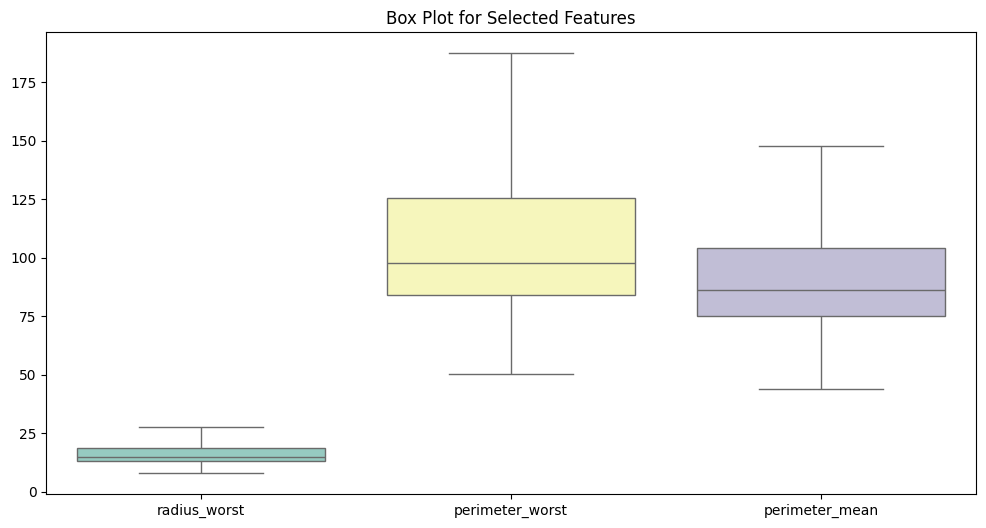

In [17]:
# EDA: Box Plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['radius_worst', 'perimeter_worst', 'perimeter_mean']], palette="Set3")
plt.title('Box Plot for Selected Features')
plt.show()

### Features selection & Separating The Dataset into Features and Output label

In [18]:
# Select Top 5 Features Based on Correlation
top_features = correlation['diagnosis'].abs().sort_values(ascending=False).index[1:6]
print("Selected Top Features for Prediction:", list(top_features))

# Prepare Data
X = df[top_features]
y = df['diagnosis']

Selected Top Features for Prediction: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean']


### Standardization

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Normalization
Normalize the training dataset to enhance model performance.
The normalization process involves subtracting the mean from each value and then dividing by
the standard deviation. This results in normalized attributes with a mean of 0 and a standard
deviation of 1.

In [20]:
# Normalize data if algorithms require it
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
X_normalized = normalizer.fit_transform(X)

### Train - Test Split
###### 80% - training data
###### 20% - testing data

In [21]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Machine Learning Model
1. Random Forest
2. KNN

#### Function to evaluate model metrics

In [26]:
# Function to evaluate models with metrics
def evaluate_metrics(y_true, y_pred, y_proba=None):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (tn + fp)
    fnr = fn / (tp + fn)
    precision = tp / (tp + fp)
    f1 = 2 * tp / (2 * tp + fp + fn)
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    error_rate = (fp + fn) / (tp + fp + fn + tn)
    bacc = (tpr + tnr) / 2
    tss = tpr - fpr
    hss = 2 * (tp * tn - fp * fn) / ((tp + fn) * (fn + tn) + (tp + fp) * (fp + tn))
    recall = tp / tp + fn
    specificity = tn / (tn + fp)

    roc = roc_auc_score(y_true, y_proba)

    metrics = {
        "tp": tp, "tn": tn, "fp": fp, "fn": fn,
        "tpr": tpr, "tnr": tnr, "fpr": fpr, "fnr": fnr,
        "Accuracy": accuracy, "Precision": precision, "Error Rate": error_rate,
        "Recall": recall, "Specificity":specificity, "F1 Score": f1,
        "bacc": bacc, "tss": tss, "hss": hss, "roc": roc
    }

    return metrics


#### Function to print model metric for each fold

In [27]:
# Function to print metrics
def print_metrics(metrics, fold):
    print(f"Fold {fold} Metrics:")
    for key, value in metrics.items():
        print(f"{key}: {value:.4f}" if isinstance(value, float) else f"{key}: {value}")
    print("-" * 40)

#### Grid Search with Cross Validation

In [28]:
# GridSearchCV and Cross-Validation
def grid_search_cv_and_evaluate(model, param_grid, X, y):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    print(f"Best Parameters: {grid_search.best_params_}")

    # Cross-Validation
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    fold = 1
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        best_model.fit(X_train, y_train)
        y_pred = best_model.predict(X_test)
        y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None
        metrics = evaluate_metrics(y_test, y_pred, y_proba)
        if fold == 10:
            best_metrics = metrics
        print_metrics(metrics, fold)
        fold += 1
    return best_metrics, best_model

### Random Forest


In [29]:
# Random Forest Hyperparameters and Evaluation
print("\nRandom Forest:")
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_metrics_rf, best_rf = grid_search_cv_and_evaluate(RandomForestClassifier(random_state=42), rf_param_grid, X, y)



Random Forest:
Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Fold 1 Metrics:
tp: 21
tn: 33
fp: 2
fn: 1
tpr: 0.9545
tnr: 0.9429
fpr: 0.0571
fnr: 0.0455
Accuracy: 0.9474
Precision: 0.9130
Error Rate: 0.0526
Recall: 2.0000
Specificity: 0.9429
F1 Score: 0.9333
bacc: 0.9487
tss: 0.8974
hss: 0.8899
roc: 0.9935
----------------------------------------
Fold 2 Metrics:
tp: 22
tn: 33
fp: 2
fn: 0
tpr: 1.0000
tnr: 0.9429
fpr: 0.0571
fnr: 0.0000
Accuracy: 0.9649
Precision: 0.9167
Error Rate: 0.0351
Recall: 1.0000
Specificity: 0.9429
F1 Score: 0.9565
bacc: 0.9714
tss: 0.9429
hss: 0.9272
roc: 0.9987
----------------------------------------
Fold 3 Metrics:
tp: 18
tn: 35
fp: 1
fn: 3
tpr: 0.8571
tnr: 0.9722
fpr: 0.0278
fnr: 0.1429
Accuracy: 0.9298
Precision: 0.9474
Error Rate: 0.0702
Recall: 4.0000
Specificity: 0.9722
F1 Score: 0.9000
bacc: 0.9147
tss: 0.8294
hss: 0.8462
roc: 0.9921
----------------------------------------
Fold 4 Metrics:
tp: 

### KNN

In [30]:
# KNN Hyperparameters and Evaluation
print("\nKNN:")
knn_param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
best_metrics_knn, best_knn = grid_search_cv_and_evaluate(KNeighborsClassifier(), knn_param_grid, X, y)


KNN:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Fold 1 Metrics:
tp: 21
tn: 33
fp: 2
fn: 1
tpr: 0.9545
tnr: 0.9429
fpr: 0.0571
fnr: 0.0455
Accuracy: 0.9474
Precision: 0.9130
Error Rate: 0.0526
Recall: 2.0000
Specificity: 0.9429
F1 Score: 0.9333
bacc: 0.9487
tss: 0.8974
hss: 0.8899
roc: 0.9669
----------------------------------------
Fold 2 Metrics:
tp: 22
tn: 35
fp: 0
fn: 0
tpr: 1.0000
tnr: 1.0000
fpr: 0.0000
fnr: 0.0000
Accuracy: 1.0000
Precision: 1.0000
Error Rate: 0.0000
Recall: 1.0000
Specificity: 1.0000
F1 Score: 1.0000
bacc: 1.0000
tss: 1.0000
hss: 1.0000
roc: 1.0000
----------------------------------------
Fold 3 Metrics:
tp: 19
tn: 35
fp: 1
fn: 2
tpr: 0.9048
tnr: 0.9722
fpr: 0.0278
fnr: 0.0952
Accuracy: 0.9474
Precision: 0.9500
Error Rate: 0.0526
Recall: 3.0000
Specificity: 0.9722
F1 Score: 0.9268
bacc: 0.9385
tss: 0.8770
hss: 0.8858
roc: 0.9729
----------------------------------------
Fold 4 Metrics:
tp: 15
tn: 34
fp: 2
fn: 6
tpr: 0.7143
t

### Deep Learning Model
1. LSTM

In [31]:
# Prepare Data for Deep Learning Models
X_dl = np.expand_dims(X, axis=2)  # Add channel dimension for Conv1D
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [32]:
# LSTM Model
def train_lstm_cv(X, y):
    fold = 1
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = Sequential([
            LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=False),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dense(1, activation='sigmoid')
        ])
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        model.fit(X_train, y_train, epochs=10, batch_size=16, verbose=0)

        y_proba = model.predict(X_test).flatten()
        y_pred = (y_proba > 0.5).astype(int)
        metrics = evaluate_metrics(y_test, y_pred, y_proba)
        print_metrics(metrics, fold)
        if fold == 10:
            best_metrics = metrics
        fold += 1
    return best_metrics, model

print("\nLSTM Cross-Validation:")
best_metrics_lstm, best_lstm = train_lstm_cv(X_dl, y)


LSTM Cross-Validation:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Fold 1 Metrics:
tp: 21
tn: 34
fp: 1
fn: 1
tpr: 0.9545
tnr: 0.9714
fpr: 0.0286
fnr: 0.0455
Accuracy: 0.9649
Precision: 0.9545
Error Rate: 0.0351
Recall: 2.0000
Specificity: 0.9714
F1 Score: 0.9545
bacc: 0.9630
tss: 0.9260
hss: 0.9260
roc: 0.9961
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Fold 2 Metrics:
tp: 22
tn: 33
fp: 2
fn: 0
tpr: 1.0000
tnr: 0.9429
fpr: 0.0571
fnr: 0.0000
Accuracy: 0.9649
Precision: 0.9167
Error Rate: 0.0351
Recall: 1.0000
Specificity: 0.9429
F1 Score: 0.9565
bacc: 0.9714
tss: 0.9429
hss: 0.9272
roc: 0.9974
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Fold 3 Metrics:
tp: 19
tn: 36
fp: 0
fn: 2
tpr: 0.9048
tnr: 1.0000
fpr: 0.0000
fnr: 0.0952
Accuracy: 0.9649
Precision: 1.0000
Error Rate: 0.0351
Recall: 3.0000
Specificity: 1.0000
F1 Score: 0.9500
bacc: 0.9524
tss: 0.9048
hss: 0.9231
roc: 1.0000
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Fold 4 Metrics:
tp: 15
tn: 35
fp: 1
fn: 6
tpr: 0.7143
tnr: 0.9722
fpr: 0.0278
fnr: 0.2857
Accuracy: 0.8772
Precision: 0.9375
Error Rate: 0.1228
Recall: 7.0000
Specificity: 0.9722
F1 Score: 0.8108
bacc: 0.8433
tss: 0.6865
hss: 0.7223
roc: 0.9458
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
Fold 5 Metrics:
tp: 19
tn: 35
fp: 1
fn: 2
tpr: 0.9048
tnr: 0.9722
fpr: 0.0278
fnr: 0.0952
Accuracy: 0.9474
Precision: 0.9500
Error Rate: 0.0526
Recall: 3.0000
Specificity: 0.9722
F1 Score: 0.9268
bacc: 0.9385
tss: 0.8770
hss: 0.8858
roc: 0.9643
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
Fold 6 Metrics:
tp: 18
tn: 36
fp: 0
fn: 3
tpr: 0.8571
tnr: 1.0000
fpr: 0.0000
fnr: 0.1429
Accuracy: 0.9474
Precision: 1.0000
Error Rate: 0.0526
Recall: 4.0000
Specificity: 1.0000
F1 Score: 0.9231
bacc: 0.9286
tss: 0.8571
hss: 0.8834
roc: 0.9868
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Fold 7 Metrics:
tp: 18
tn: 33
fp: 3
fn: 3
tpr: 0.8571
tnr: 0.9167
fpr: 0.0833
fnr: 0.1429
Accuracy: 0.8947
Precision: 0.8571
Error Rate: 0.1053
Recall: 4.0000
Specificity: 0.9167
F1 Score: 0.8571
bacc: 0.8869
tss: 0.7738
hss: 0.7738
roc: 0.9841
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Fold 8 Metrics:
tp: 20
tn: 34
fp: 2
fn: 1
tpr: 0.9524
tnr: 0.9444
fpr: 0.0556
fnr: 0.0476
Accuracy: 0.9474
Precision: 0.9091
Error Rate: 0.0526
Recall: 2.0000
Specificity: 0.9444
F1 Score: 0.9302
bacc: 0.9484
tss: 0.8968
hss: 0.8880
roc: 0.9974
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
Fold 9 Metrics:
tp: 18
tn: 35
fp: 1
fn: 3
tpr: 0.8571
tnr: 0.9722
fpr: 0.0278
fnr: 0.1429
Accuracy: 0.9298
Precision: 0.9474
Error Rate: 0.0702
Recall: 4.0000
Specificity: 0.9722
F1 Score: 0.9000
bacc: 0.9147
tss: 0.8294
hss: 0.8462
roc: 0.9894
----------------------------------------


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
Fold 10 Metrics:
tp: 20
tn: 35
fp: 0
fn: 1
tpr: 0.9524
tnr: 1.0000
fpr: 0.0000
fnr: 0.0476
Accuracy: 0.9821
Precision: 1.0000
Error Rate: 0.0179
Recall: 2.0000
Specificity: 1.0000
F1 Score: 0.9756
bacc: 0.9762
tss: 0.9524
hss: 0.9615
roc: 1.0000
----------------------------------------


### ROC-AUC
 Evaluating the performance of various algorithms by comparing their ROC
curves and AUC scores on the test dataset.

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC Curve
def plot_roc_curve(y_test, y_proba, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guess')
    plt.title(f'ROC Curve - {model_name}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()


Random Forest ROC Curve:


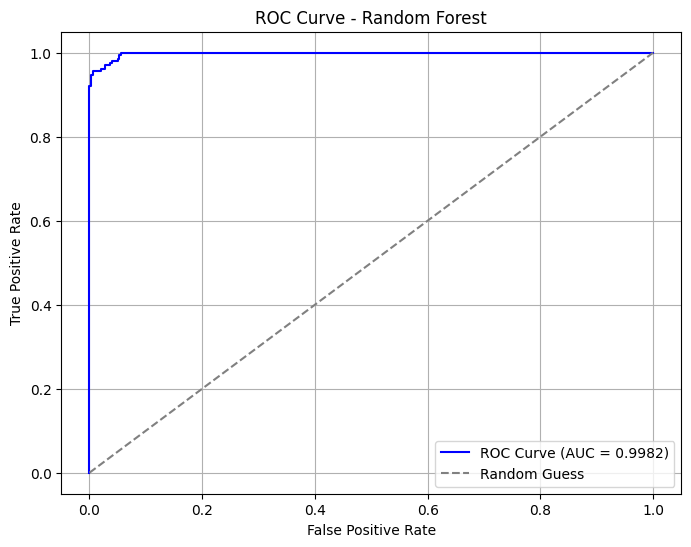

In [34]:
# Plot ROC Curve for Random Forest
print("\nRandom Forest ROC Curve:")
rf_y_proba = best_rf.predict_proba(X)[:, 1]
plot_roc_curve(y, rf_y_proba, 'Random Forest')


KNN ROC Curve:


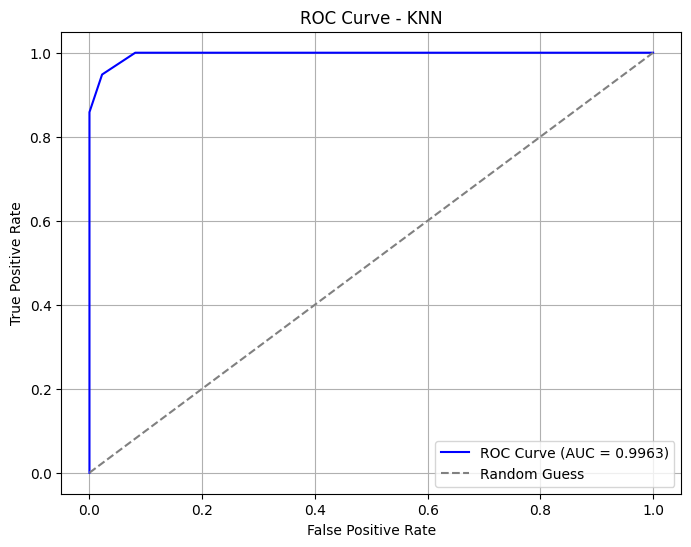

In [35]:
# Plot ROC Curve for KNN
print("\nKNN ROC Curve:")
knn_y_proba = best_knn.predict_proba(X)[:, 1]
plot_roc_curve(y, knn_y_proba, 'KNN')


LSTM ROC Curve:


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step


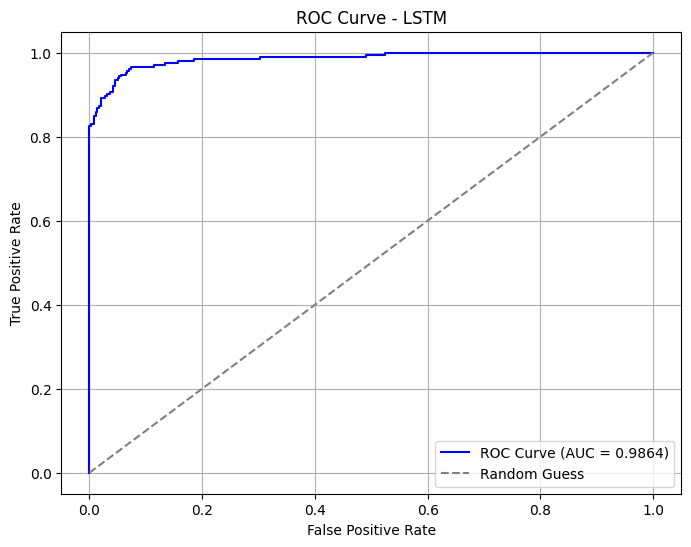

In [36]:
# Plot ROC Curve for LSTM
print("\nLSTM ROC Curve:")
lstm_model = Sequential([
    LSTM(64, input_shape=(X_dl.shape[1], 1), return_sequences=False),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_dl, y, epochs=10, batch_size=16, verbose=0)
lstm_y_proba = lstm_model.predict(X_dl).flatten()
plot_roc_curve(y, lstm_y_proba, 'LSTM')


### Model Comparision

In [37]:
all_metrics = {
    "Random Forest": best_metrics_rf,
    "KNN": best_metrics_knn,
    "LSTM": best_metrics_lstm
}

all_metrics_df = pd.DataFrame(all_metrics)
all_metrics_df

,Random Forest,KNN,LSTM
tp,21.0,21.0,20.000000
tn,35.0,35.0,35.000000
fp,0.0,0.0,0.000000
fn,0.0,0.0,1.000000
tpr,1.0,1.0,0.952381
tnr,1.0,1.0,1.000000
fpr,0.0,0.0,0.000000
fnr,0.0,0.0,0.047619
Accuracy,1.0,1.0,0.982143
Precision,1.0,1.0,1.000000
